In [72]:
from scipy.optimize import minimize

from scipy.stats import norm, invgamma
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

Given the information below, find reasonable values for the prior parameters of the
normal-inverse-gamma distribution — μ₀, ν₀, α₀, β₀

In [74]:
# We sample the mean from a normal distribution
# We sample the variance from the inverse-gamma

# Objective function: minimize error
# Error of resulting
# F(u0,v0,a0,b0)= (u0 - 2.3)^2 + (v0 - 0.5)^2 + ... 

def likelihood_objective(start):

    mu, lambda_, alpha, beta = start
    
    x_expected = 2.3 - mu
    x_variance = 0.5 - (beta/(lambda_*(alpha - 1)))

    sigma_expected = 2.75 - (beta/(alpha - 1)) 
    sigma_variance =  1 - ((beta**2)/((alpha - 2)*((alpha - 1)**2)))

    return x_expected**2 + x_variance**2 + sigma_expected**2 + sigma_variance**2

result = minimize(likelihood_objective, [2,2,4,2])

mu, var, alpha, beta = result.x

print(mu, var, alpha, beta)

2.2999997268374988 5.500069624843204 9.562506627433052 23.54688657047


In [66]:
def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    # Sample sigma^2 from the inverse-gamma distribution
    sigma2 = sts.invgamma.rvs(a=alpha, scale=beta, size=size)
    # Sample x from the normal distribution
    x = sts.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)
    return np.vstack((x, sigma2)).transpose()



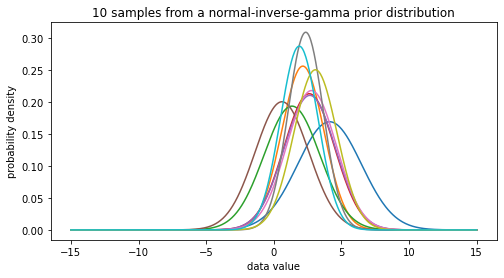

In [73]:
num_samples = 10
samples = norminvgamma_rvs(mu, var, alpha, beta, size=num_samples)

plt.figure(figsize=(8, 4))
x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    y = sts.norm.pdf(x, loc=samples[i, 0], scale=np.sqrt(samples[i, 1]))
    plt.plot(x, y)
plt.xlabel('data value')
plt.ylabel('probability density')
plt.title('%i samples from a normal-inverse-gamma prior distribution' % num_samples)
plt.show()